[Blog and code for Auto encoder (maile tal gareko yahi blog bata ho)](https://blog.keras.io/building-autoencoders-in-keras.html)

# AUTO ENCODER 
* Unsupervise machine  Learning similar to the pca.
* it minimize the same objective function as pca.
* It is a neural network.
* The neural network's target output us its input.
* Reconstruct the input 
* Label are input
* Dimentionality reduction

#  PCA VS AUTOENCODER 
* Auto encoder can learn non-linear transform unlike PCA.
* An autoencoder doesn't have to learn dense layers. 
* More efficiency to learn several layers with an autoencoder.
* It gives a representation as the output of each layer.

# WHY AUTOENCODER
* Data Denosing .
* More accurate then pca.

# WHAT IS AUTOENCODER 
* An autoencoder neural network is an unsupervise machine learning algorithm that applies backpropagation ,setting the target values to be equal to the inputs.


# There are 4 hyperparameter that we need to set before training an autoencoder.

* Code:The number of nodes in the middle layer.small size results in more compression.

* Number of layer :encoder ra decoder ma vayako number of layer input ra output bahek.
* Loss function:either mean squared error or binary crossentropy.
if the input id the range of [0,1] then we typically use crossentropy ,otherwise we use the mean square error.

In [25]:
#!pip install tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)
from  tensorflow.keras.layers  import Input,Dense
from tensorflow.keras.models import Model

2.0.0


In [0]:
from keras.datasets import mnist
import numpy as np


In [27]:
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:]))) # flatten the input image 28*28 into 784 size.
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print (x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


# single fully-connected neural layer as encoder and decoder.

In [0]:
input_size=784
hidden_size=128
encoding_dim=32 # this is the size of our encoded representation
input_img=Input(shape=(input_size,))
encoded=Dense(encoding_dim,activation='relu')(input_img)

decoded=Dense(input_size,activation='sigmoid')(encoded)

autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')


# Seperate encoder model

# model maps an input to its encoded representation

In [0]:
encoder=Model(input_img,encoded)  # This model maps an input to its encoded  representation


# As wel as the decoder model



In [0]:
encoded_input=Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))

In [31]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2780 - val_loss: 0.1911
Epoch 2/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1715 - val_loss: 0.1541
Epoch 3/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1445 - val_loss: 0.1335
Epoch 4/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1278 - val_loss: 0.1202
Epoch 5/50
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1171 - val_loss: 0.1119
Epoch 6/50
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1102 - val_loss: 0.1061
Epoch 7/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1053 - val_loss: 0.1021
Epoch 8/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1017 - val_loss: 0.0990
Epoch 9/50
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0992 - val_

In [0]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)


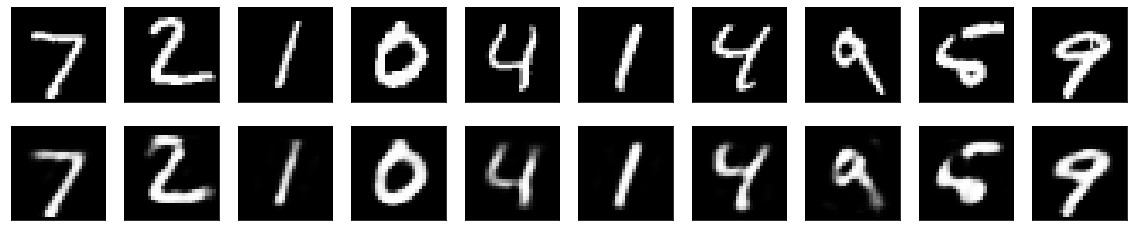

In [39]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  # display original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()



#Adding a sparsity constraint on the encoded representations
In the previous example, the representations were only constrained by the size of the hidden layer (32). In such a situation, what typically happens is that the hidden layer is learning an approximation of PCA (principal component analysis). But another way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would "fire" at a given time. In Keras, this can be done by adding an activity_regularizer to our Dense layer:


In [0]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Deep autoencoder
We do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers, such as:

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [42]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6932 - val_loss: 0.6932
Epoch 2/100
60000/60000 [==============================] - 5s 86us/sample - loss: 0.6932 - val_loss: 0.6931
Epoch 3/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6931 - val_loss: 0.6931
Epoch 4/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6930 - val_loss: 0.6930
Epoch 5/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6929 - val_loss: 0.6929
Epoch 6/100
60000/60000 [==============================] - 5s 85us/sample - loss: 0.6929 - val_loss: 0.6928
Epoch 7/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6928 - val_loss: 0.6927
Epoch 8/100
60000/60000 [==============================] - 5s 85us/sample - loss: 0.6927 - val_loss: 0.6927
Epoch 9/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.69

In [0]:
encoder=Model(input_img,encoded)  # This model maps an input to its encoded  representation


In [0]:
# encoded_input=Input(shape=(encoding_dim,))
# decoder_layer=autoencoder.layers[-1]
# decoder=Model(encoded_input,decoder_layer(encoded_input))

In [0]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)


i
love
you
madan


In [0]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  # display original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()



1


In [0]:
number=input('enter any 10 number')


enter any 10 number1,2,3,4


In [0]:
ls=[]
greater=0
ls=number.split()
for i in ls:
     if int(i)>greater: 
            greater=i
print(greater)
    

ValueError: invalid literal for int() with base 10: '1,2,3,4'